In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

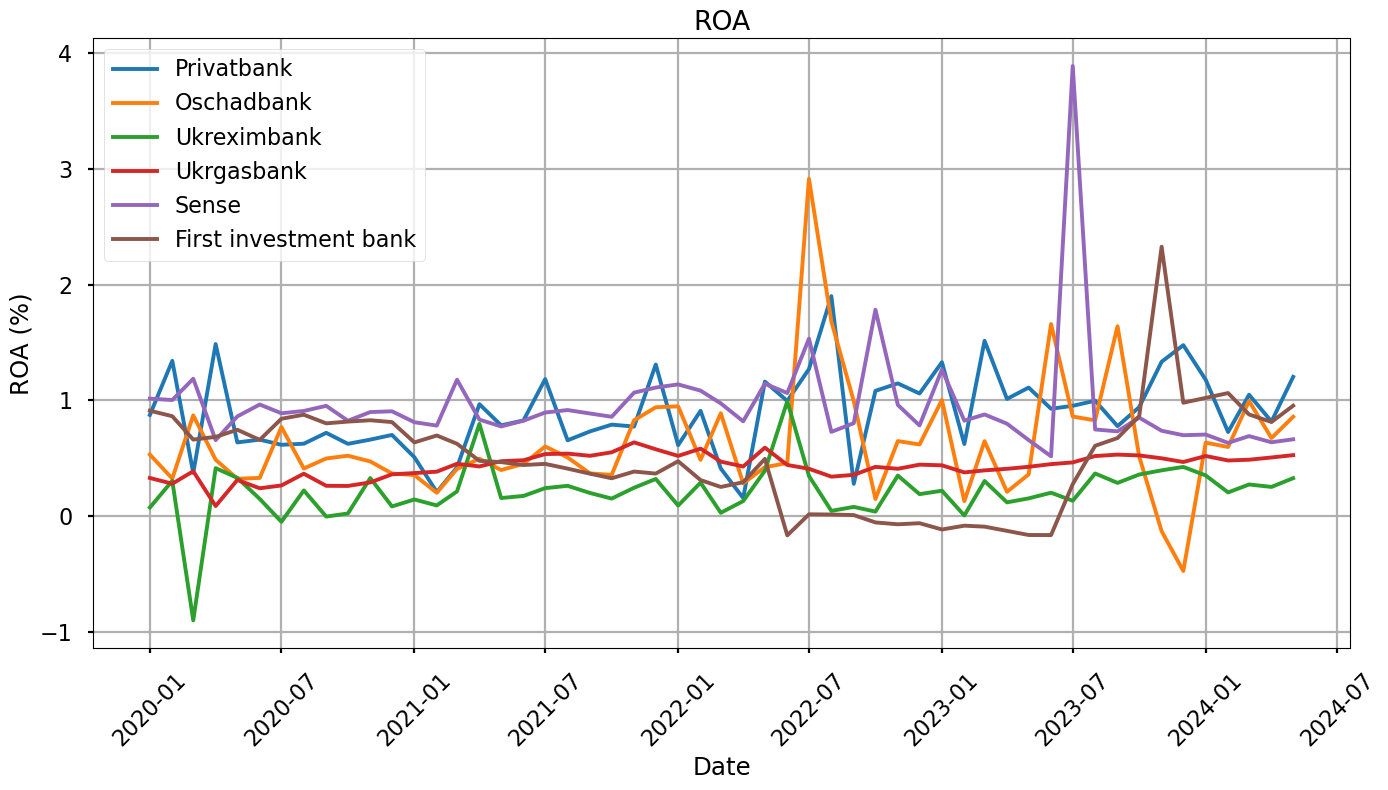

In [13]:
# Load total_income.csv and total_assets.csv
df_income = pd.read_csv('data/differenced/total_income.csv', index_col=0)
df_assets = pd.read_csv('data/original/total_assets.csv', index_col=0)

# Calculate the ratio of income to assets for each bank
ratio_df = (df_income / df_assets) * 100

# Plotting
plt.figure(figsize=(14, 8))

for bank in ratio_df.columns:
    plt.plot(pd.to_datetime(ratio_df.index), ratio_df[bank], label=bank.capitalize())

plt.title('ROA')
plt.xlabel('Date')
plt.ylabel('ROA (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


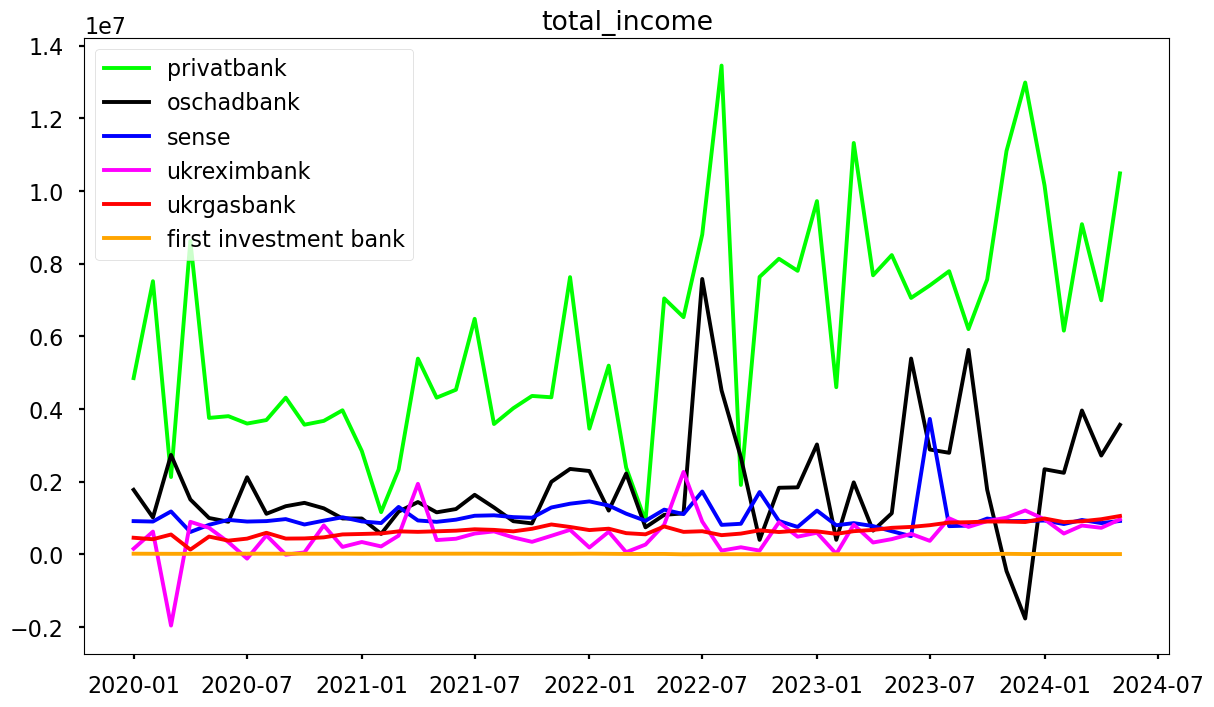

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


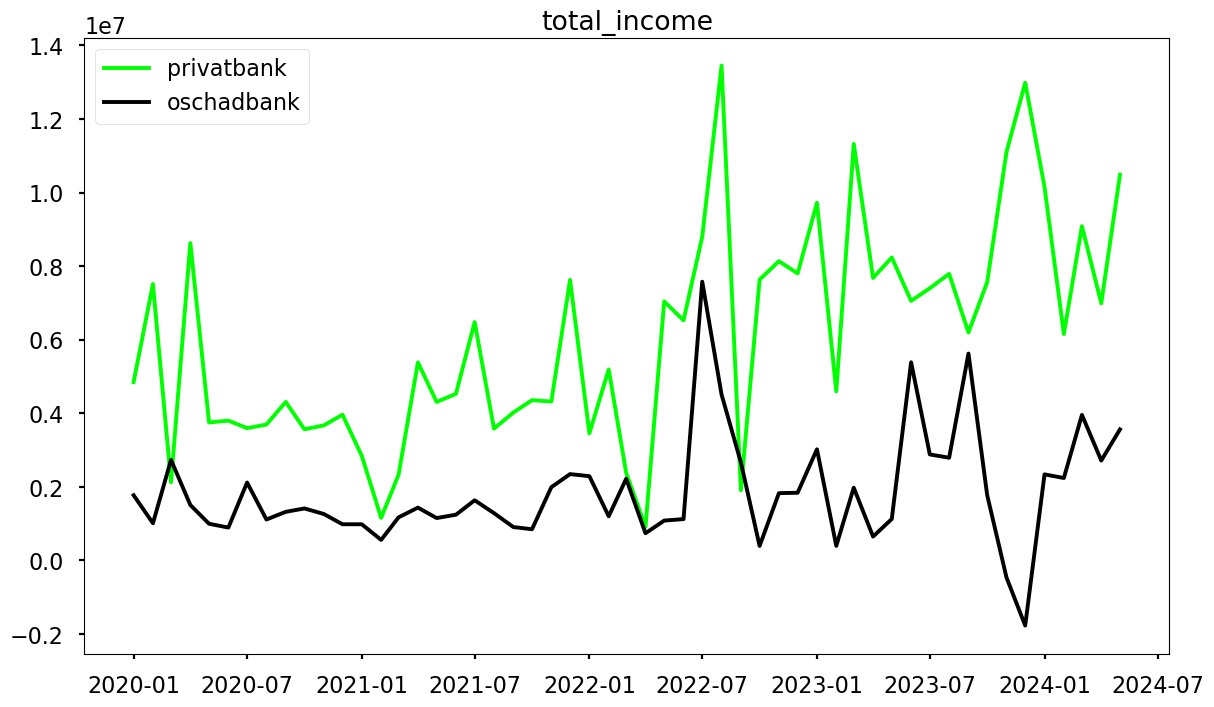

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


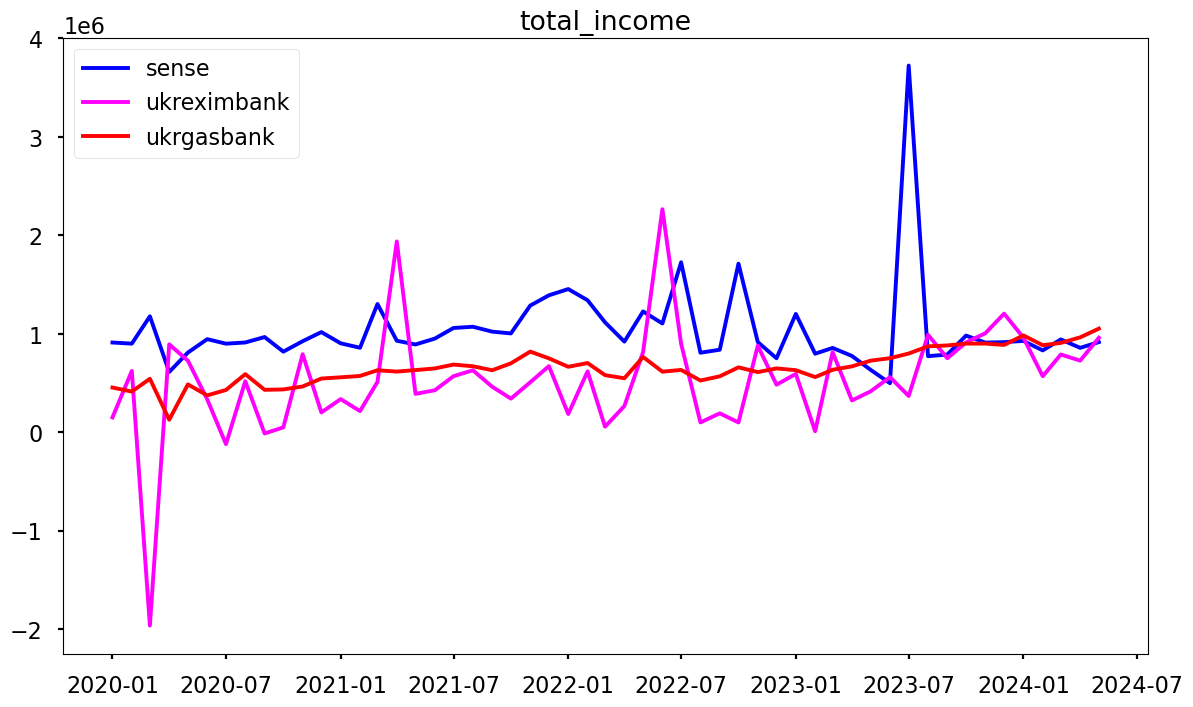

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


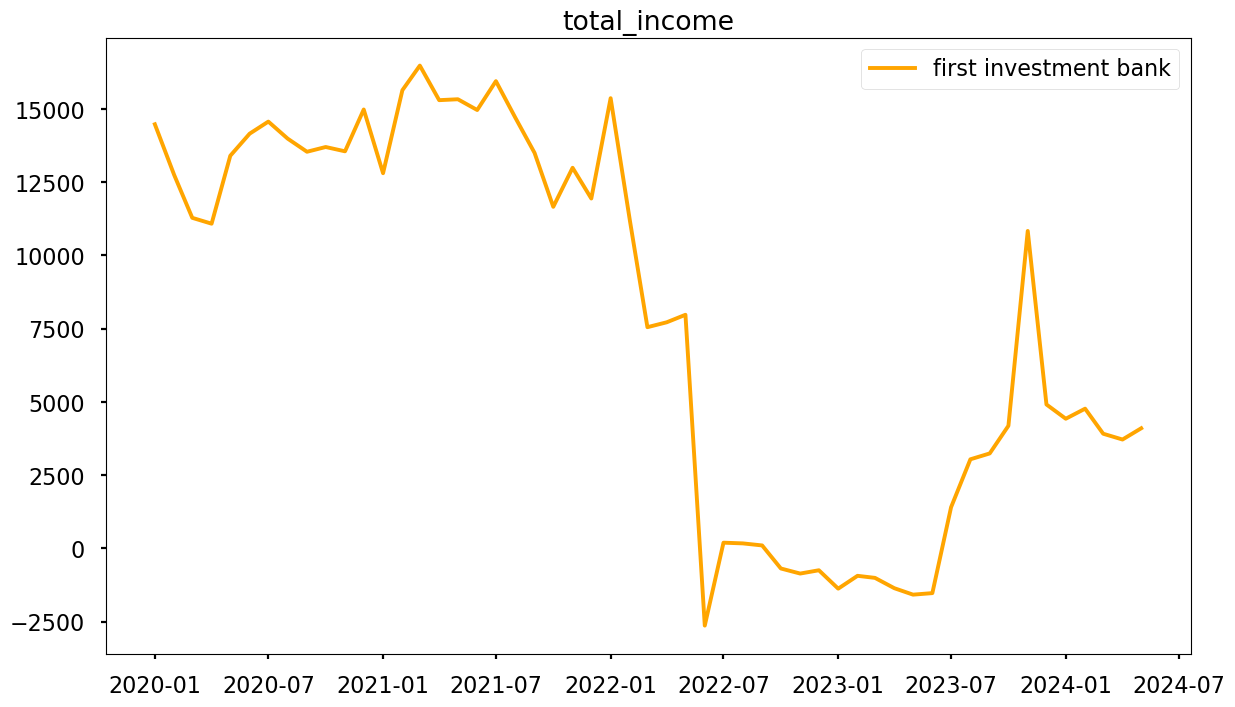

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


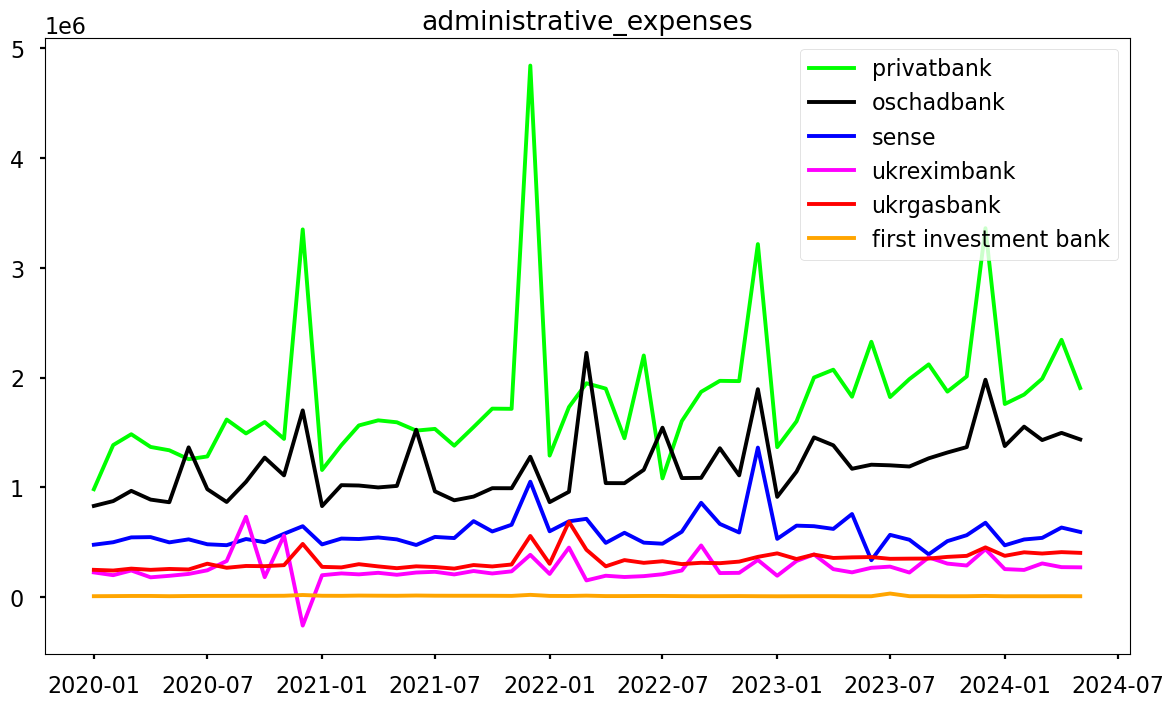

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


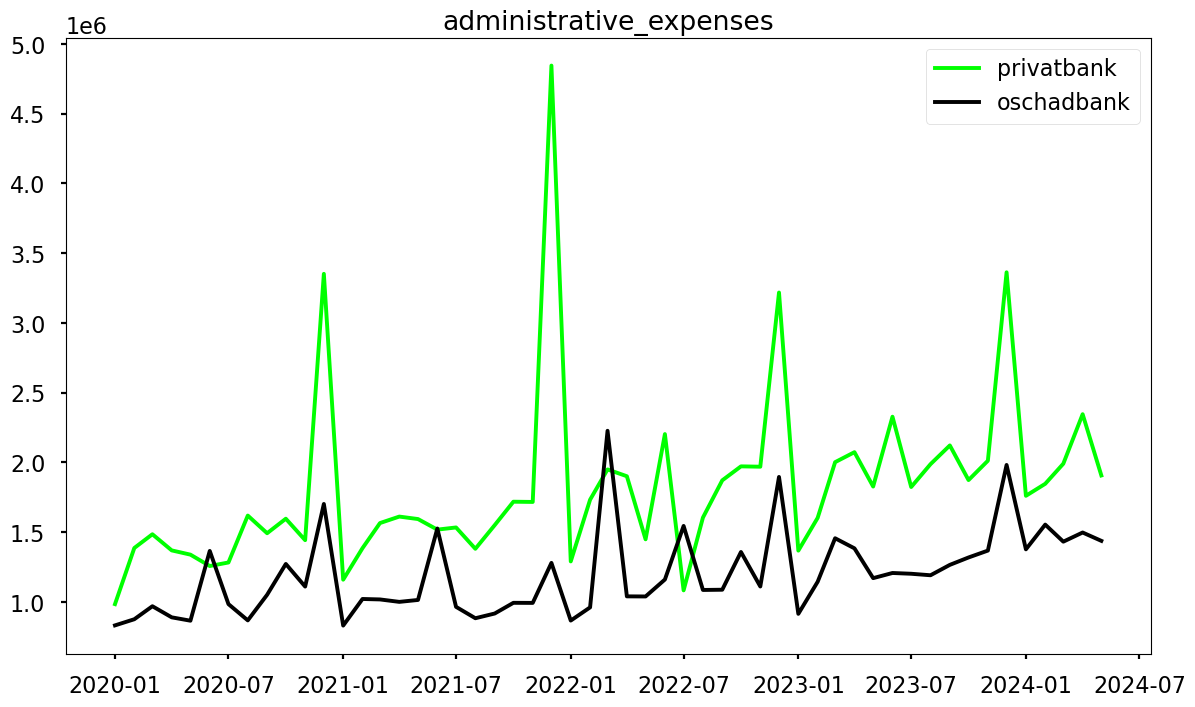

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


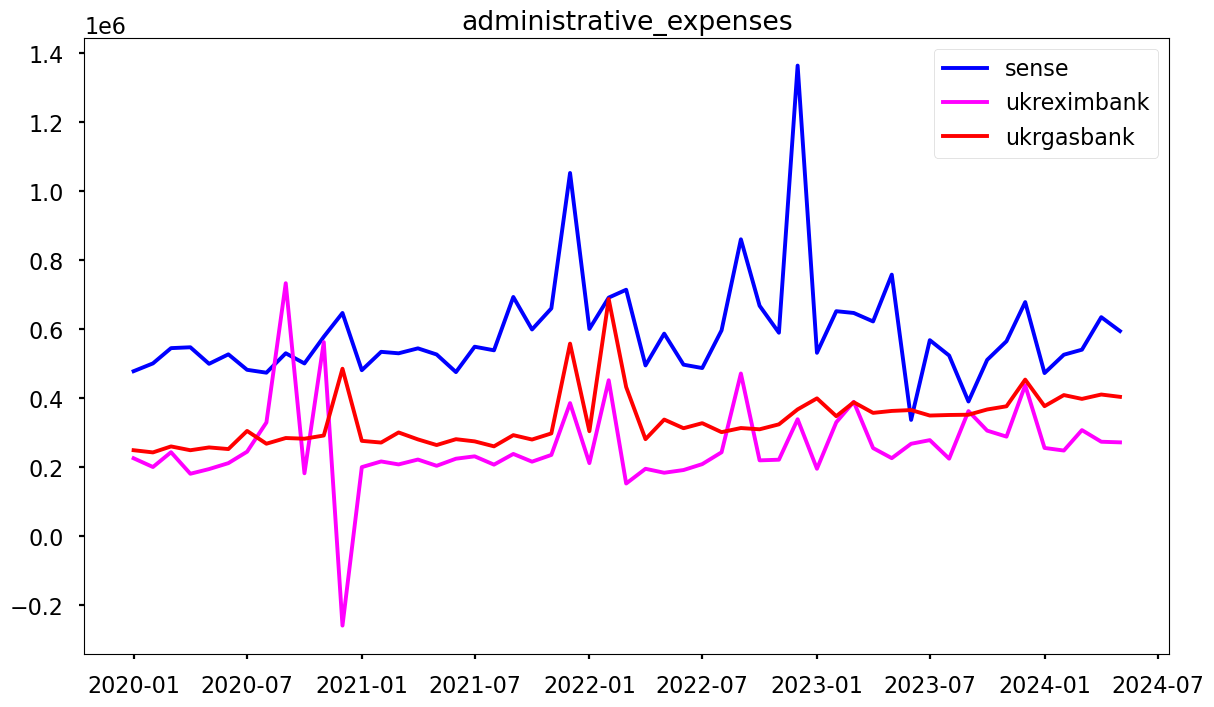

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


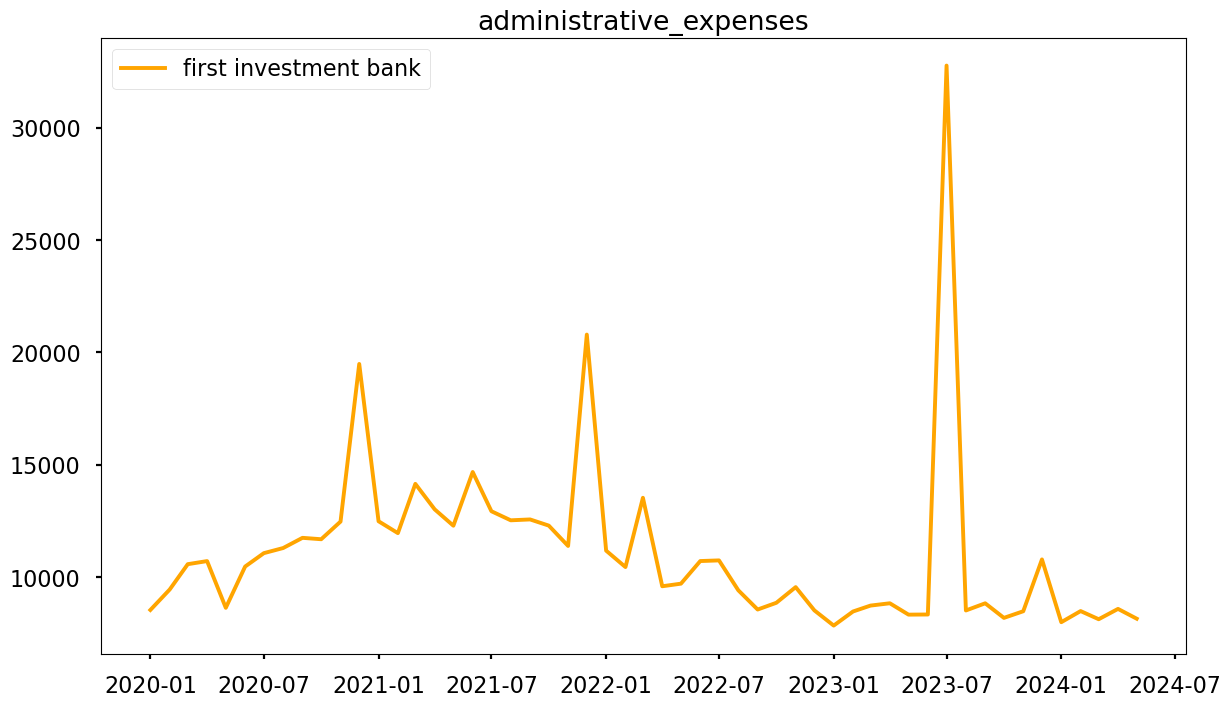

In [14]:
def plot_file(name, sel_banks, path):
    df = pd.read_csv(path + name)
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
    df.set_index(df.iloc[:, 0], inplace=True)
    plt.figure(figsize=(14, 8))
    plt.style.use('seaborn-v0_8-poster')
    plt.title(os.path.splitext(name)[0])
    for bank in sel_banks:
        plt.plot(df.index, df[bank[0]], color=bank[1], label=bank[0])
    plt.legend()
    plt.grid(visible=False)
    plt.show()
    
all_banks = [['privatbank', 'lime'], ['oschadbank', 'black'], ['sense', 'blue'], ['ukreximbank','magenta'], ['ukrgasbank', 'red'], ['first investment bank', 'orange']]

big_bank = [['privatbank', 'lime'], ['oschadbank', 'black']]
medium_bank = [['sense', 'blue'], ['ukreximbank','magenta'], ['ukrgasbank', 'red']]
micro_bank = [['first investment bank', 'orange']]

for files in ['total_income.csv', 'administrative_expenses.csv']:
    plot_file(files, all_banks, 'data/differenced/')
    plot_file(files, big_bank, 'data/differenced/')
    plot_file(files, medium_bank, 'data/differenced/')
    plot_file(files, micro_bank, 'data/differenced/')

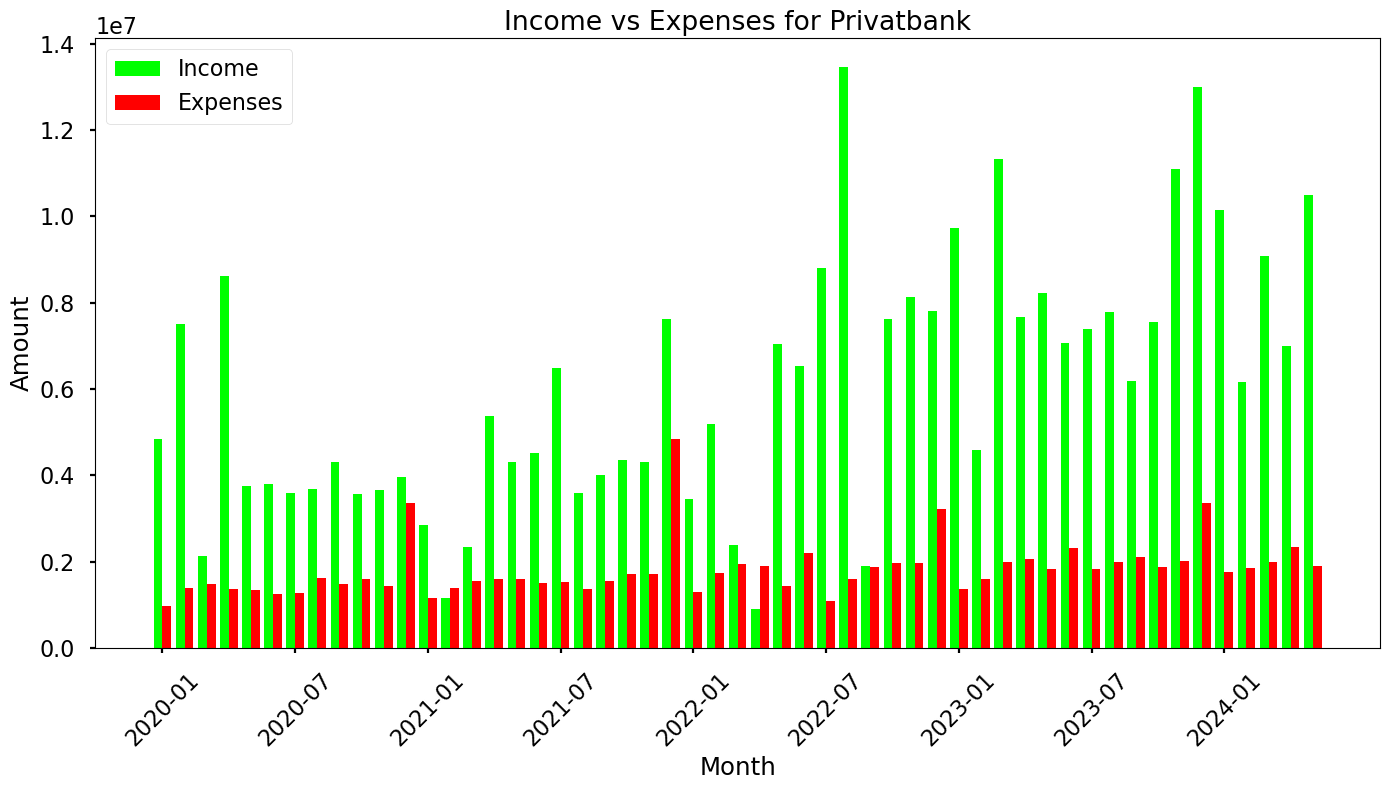

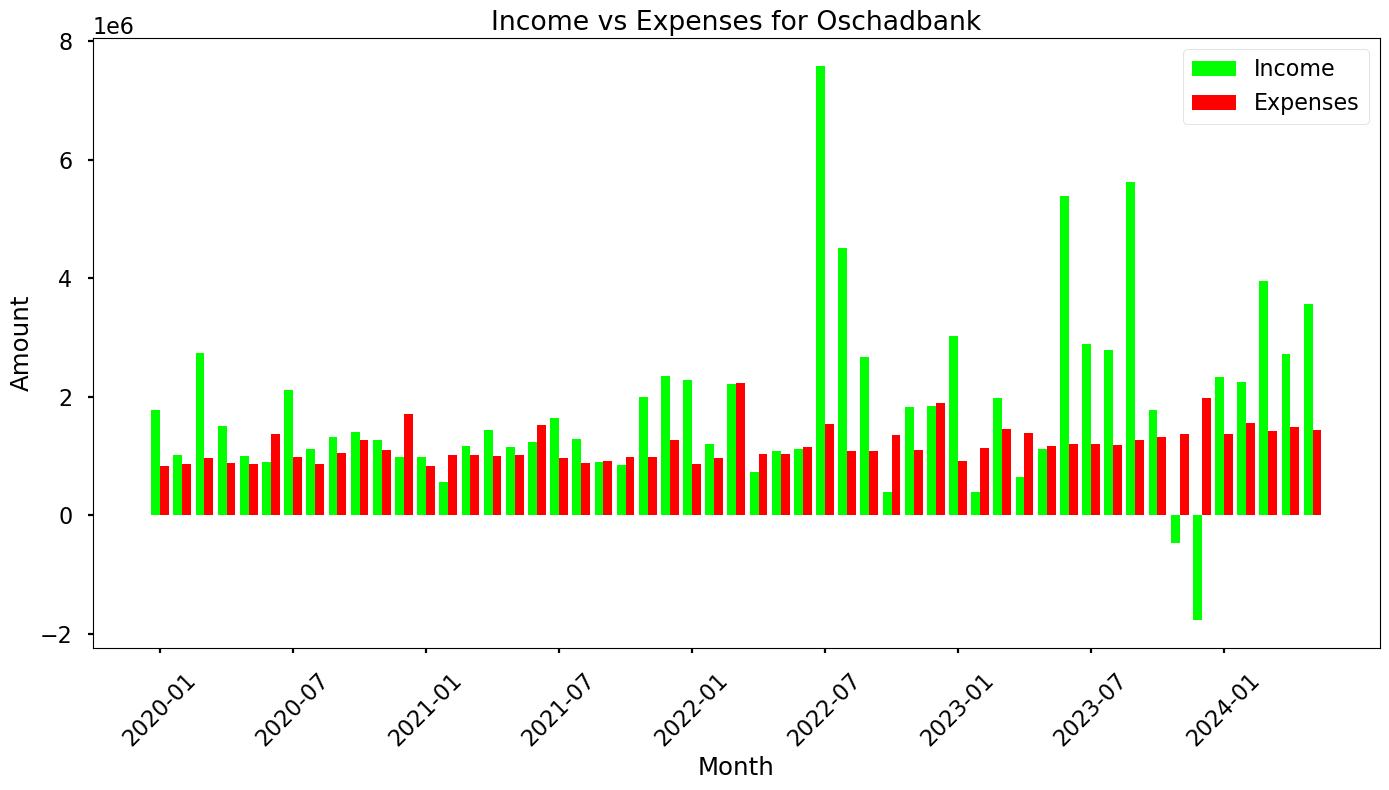

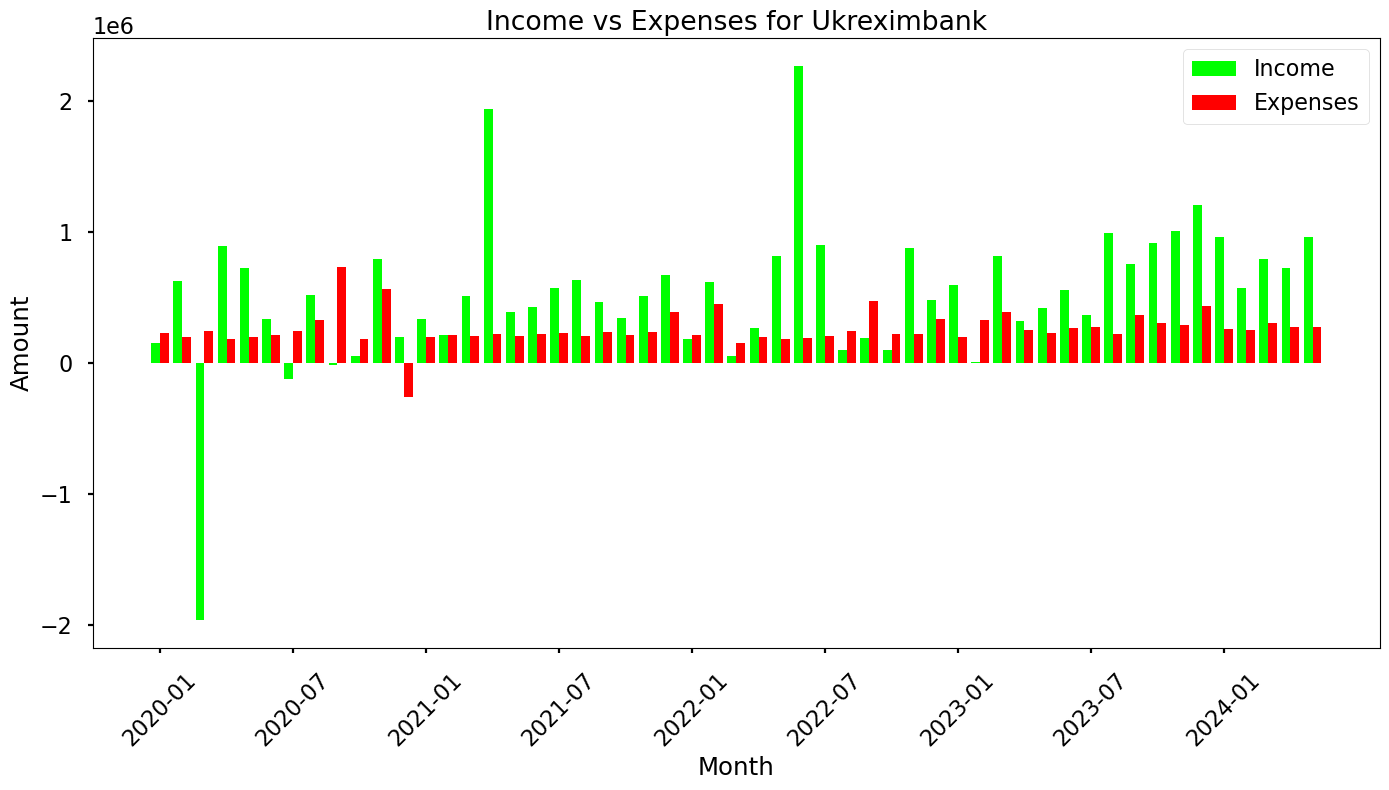

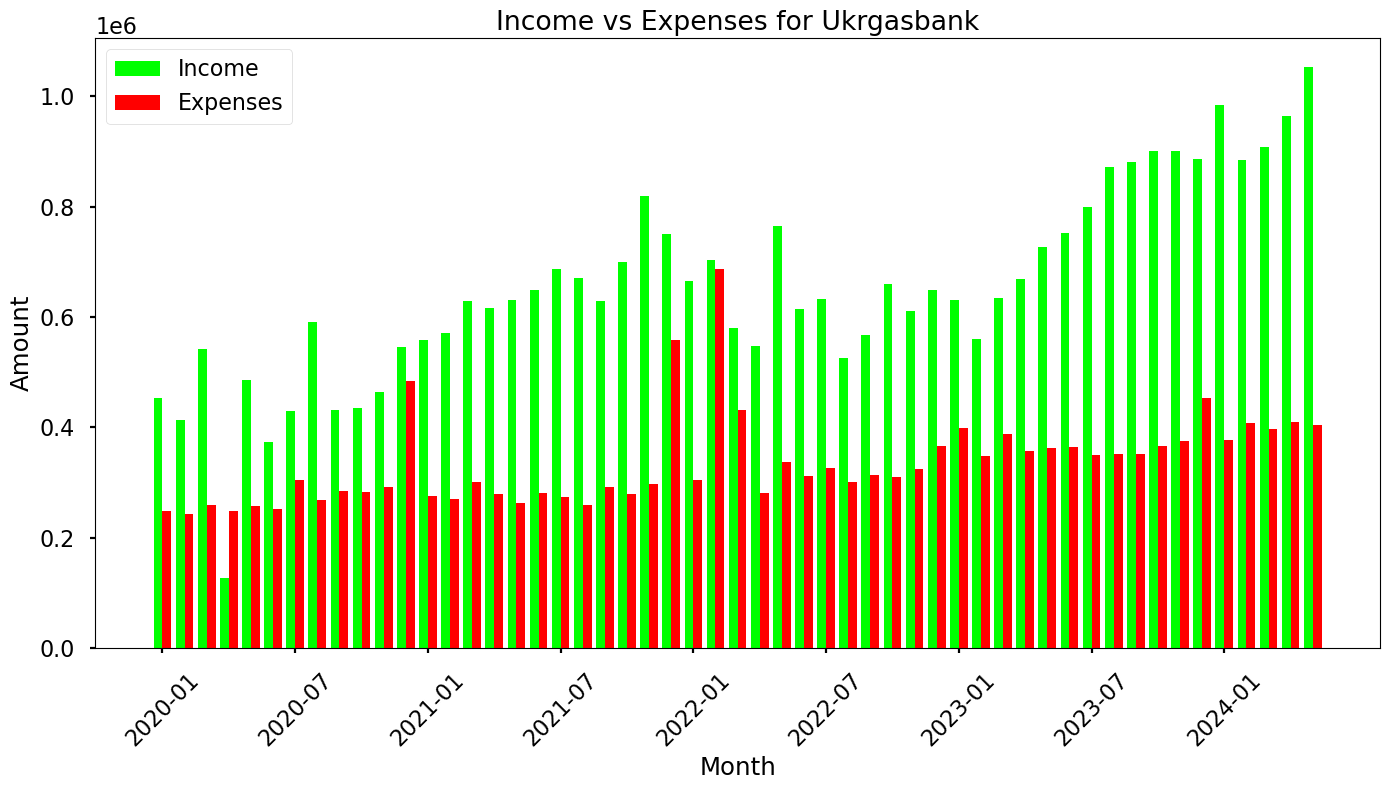

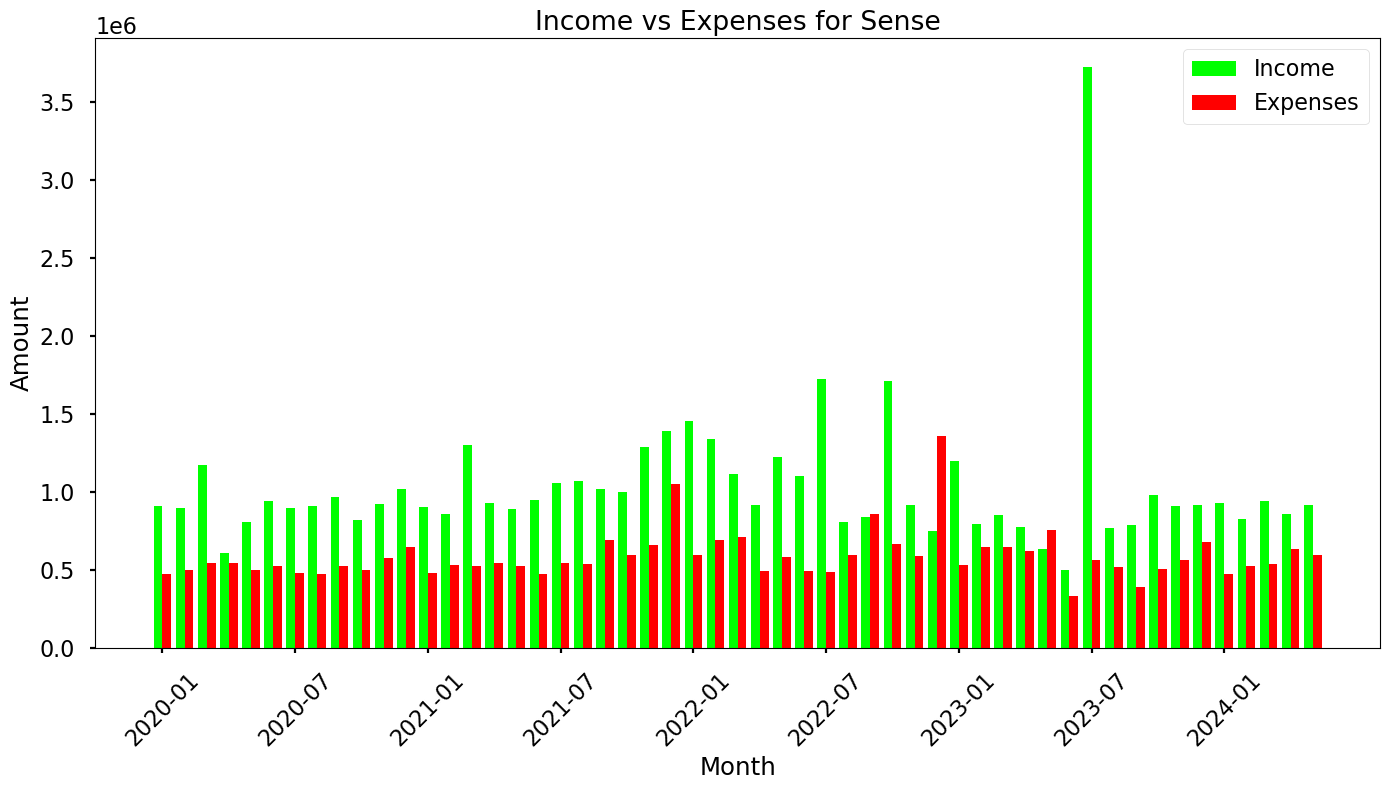

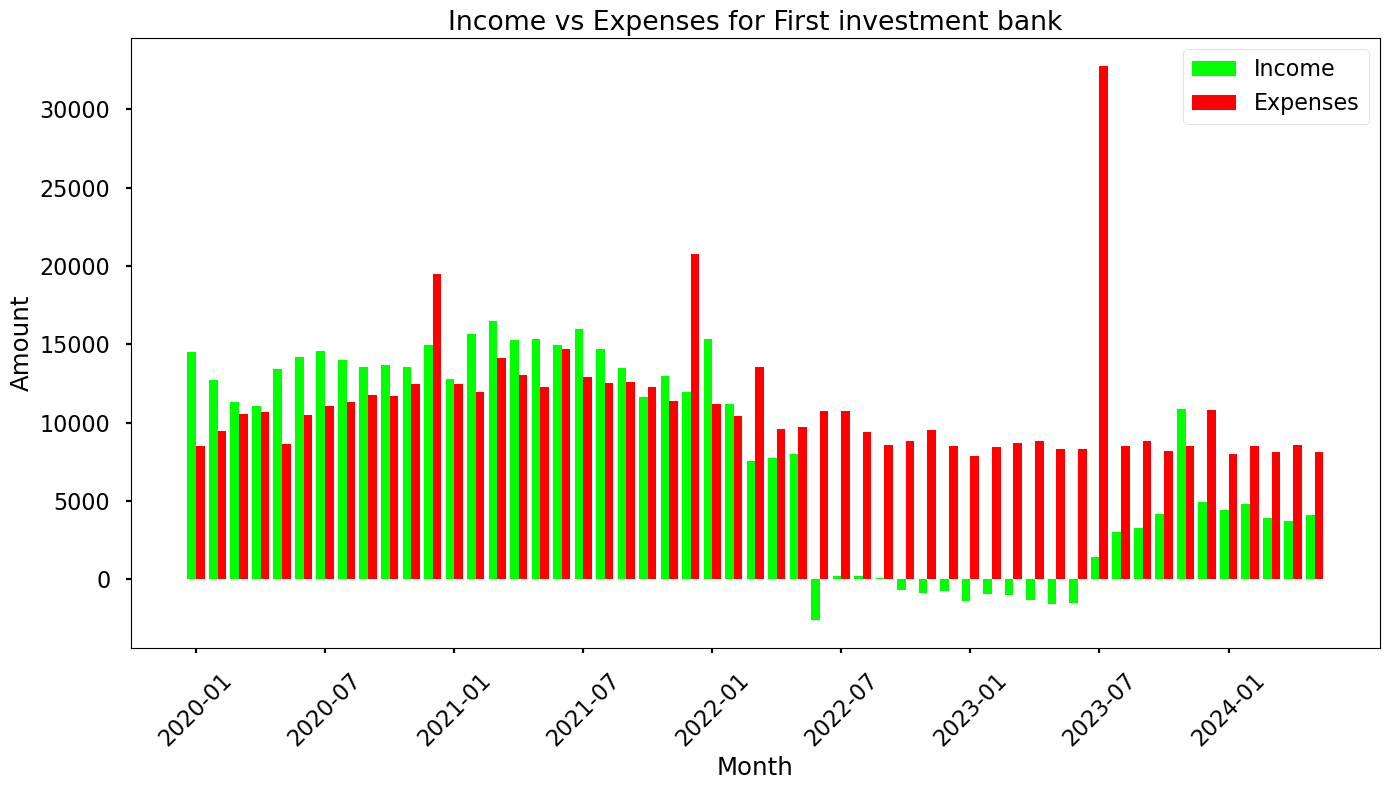

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load income and expenses data
df_income = pd.read_csv('data/differenced/total_income.csv', index_col=0)
df_expenses = pd.read_csv('data/differenced/administrative_expenses.csv', index_col=0)

# Assuming both dataframes have the same structure, check for consistency
if df_income.shape != df_expenses.shape or not df_income.columns.equals(df_expenses.columns):
    raise ValueError("Income and expenses dataframes do not match in shape or columns.")

# Prepare data for plotting
banks = df_income.columns

# Plotting histograms for each bank
for bank in banks:
    income = df_income[bank].values
    expenses = df_expenses[bank].values
    
    months = np.arange(len(income))  # Assuming each row represents a month

    bar_width = 0.4
    plt.figure(figsize=(14, 8))
    plt.bar(months - bar_width/2, income, width=bar_width, label='Income', align='center', color='lime')
    plt.bar(months + bar_width/2, expenses, width=bar_width, label='Expenses', align='center', color='red')

    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.title(f'Income vs Expenses for {bank.capitalize()}')

    # Customize x-axis ticks to show every half year
    plt.xticks(months[::6], df_income.index[::6], rotation=45)

    plt.legend()
    plt.tight_layout()
    plt.show()

